In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, Flatten, Dropout, Dense, MaxPool2D
from keras import Sequential

from keras.utils import img_to_array, array_to_img, load_img
from keras.preprocessing import image

from sklearn.model_selection import train_test_split

In [ ]:
!mkdir -p ~/.Kaggle
!cp /Users/pawankumarkc/Downloads/kaggle.json ~/.Kaggle/

In [ ]:
!kaggle datasets download -d arpitjain007/game-of-deep-learning-ship-datasets

In [2]:
train = pd.read_csv('/Users/pawankumarkc/Downloads/Datasets_to_delete/game-of-deep-learning-ship-datasets/train/train.csv')
test = pd.read_csv('/Users/pawankumarkc/Downloads/Datasets_to_delete/game-of-deep-learning-ship-datasets/test_ApKoW4T.csv')

In [3]:
print(f"Train data {train.shape} and test data {test.shape}")

Train data (6252, 2) and test data (2680, 1)


In [4]:
train.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [5]:
#Labeling the dataset with cargo types
cargo_dict = { 1: 'Cargo', 2: 'Military', 3: 'Carrier' ,  4: 'Cruise',  5: 'Tankers'}

train['label'] = train['category'].map(cargo_dict)
train.head()


,image,category,label
0,2823080.jpg,1,Cargo
1,2870024.jpg,1,Cargo
2,2662125.jpg,2,Military
3,2900420.jpg,3,Carrier
4,2804883.jpg,2,Military


In [6]:
main_path = '/Users/pawankumarkc/Downloads/Datasets_to_delete/game-of-deep-learning-ship-datasets/train/images/'

train['image'] = main_path+train['image']
train.head()

,image,category,label
0,/Users/pawankumarkc/Downloads/Datasets_to_dele...,1,Cargo
1,/Users/pawankumarkc/Downloads/Datasets_to_dele...,1,Cargo
2,/Users/pawankumarkc/Downloads/Datasets_to_dele...,2,Military
3,/Users/pawankumarkc/Downloads/Datasets_to_dele...,3,Carrier
4,/Users/pawankumarkc/Downloads/Datasets_to_dele...,2,Military


In [7]:
train['image'][0]

'/Users/pawankumarkc/Downloads/Datasets_to_delete/game-of-deep-learning-ship-datasets/train/images/2823080.jpg'

In [8]:
test['image'] = main_path+test['image']
test.head()

,image
0,/Users/pawankumarkc/Downloads/Datasets_to_dele...
1,/Users/pawankumarkc/Downloads/Datasets_to_dele...
2,/Users/pawankumarkc/Downloads/Datasets_to_dele...
3,/Users/pawankumarkc/Downloads/Datasets_to_dele...
4,/Users/pawankumarkc/Downloads/Datasets_to_dele...


## Splitting the data into train and test 

In [9]:
#Iterating through train images for resizing and normalization
resized_image_list = []
all_paths= []
target_size = (256, 256)

for i in range(train.shape[0]):
    img_path = train['image'][i]
    array_val = img_to_array(load_img(img_path).resize((target_size)))/255.
    resized_image_list.append(array_val)

resized_image_list = np.asarray(resized_image_list)
resized_image_list.shape

(6252, 256, 256, 3)

### Before resizing

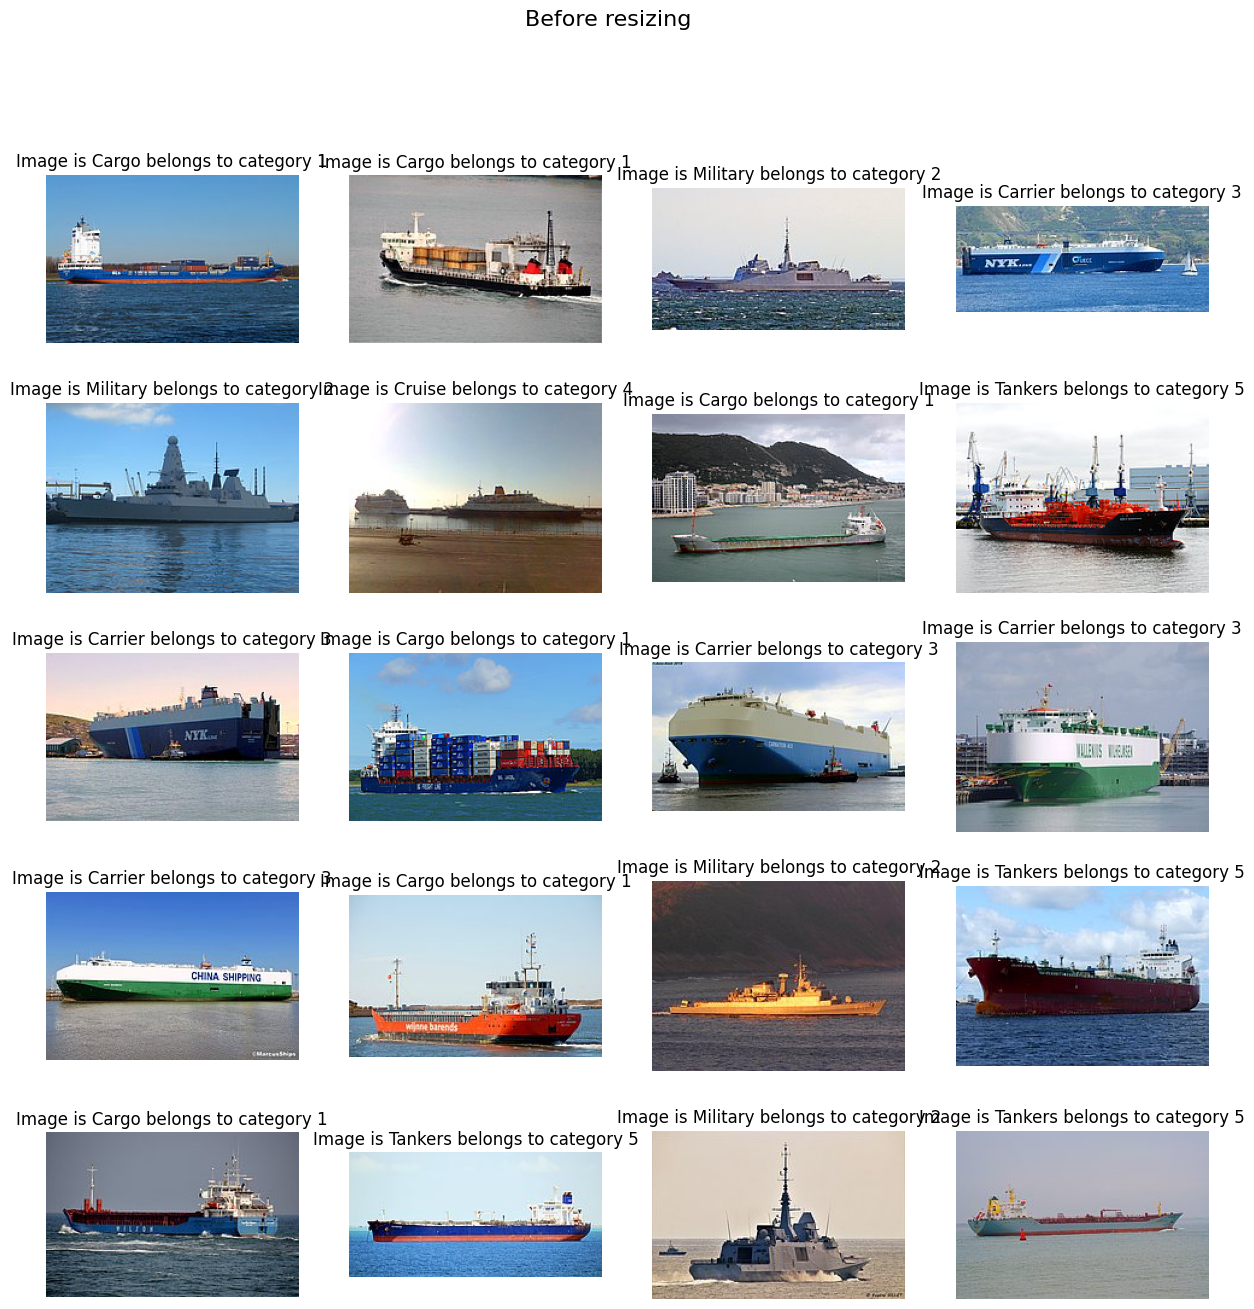

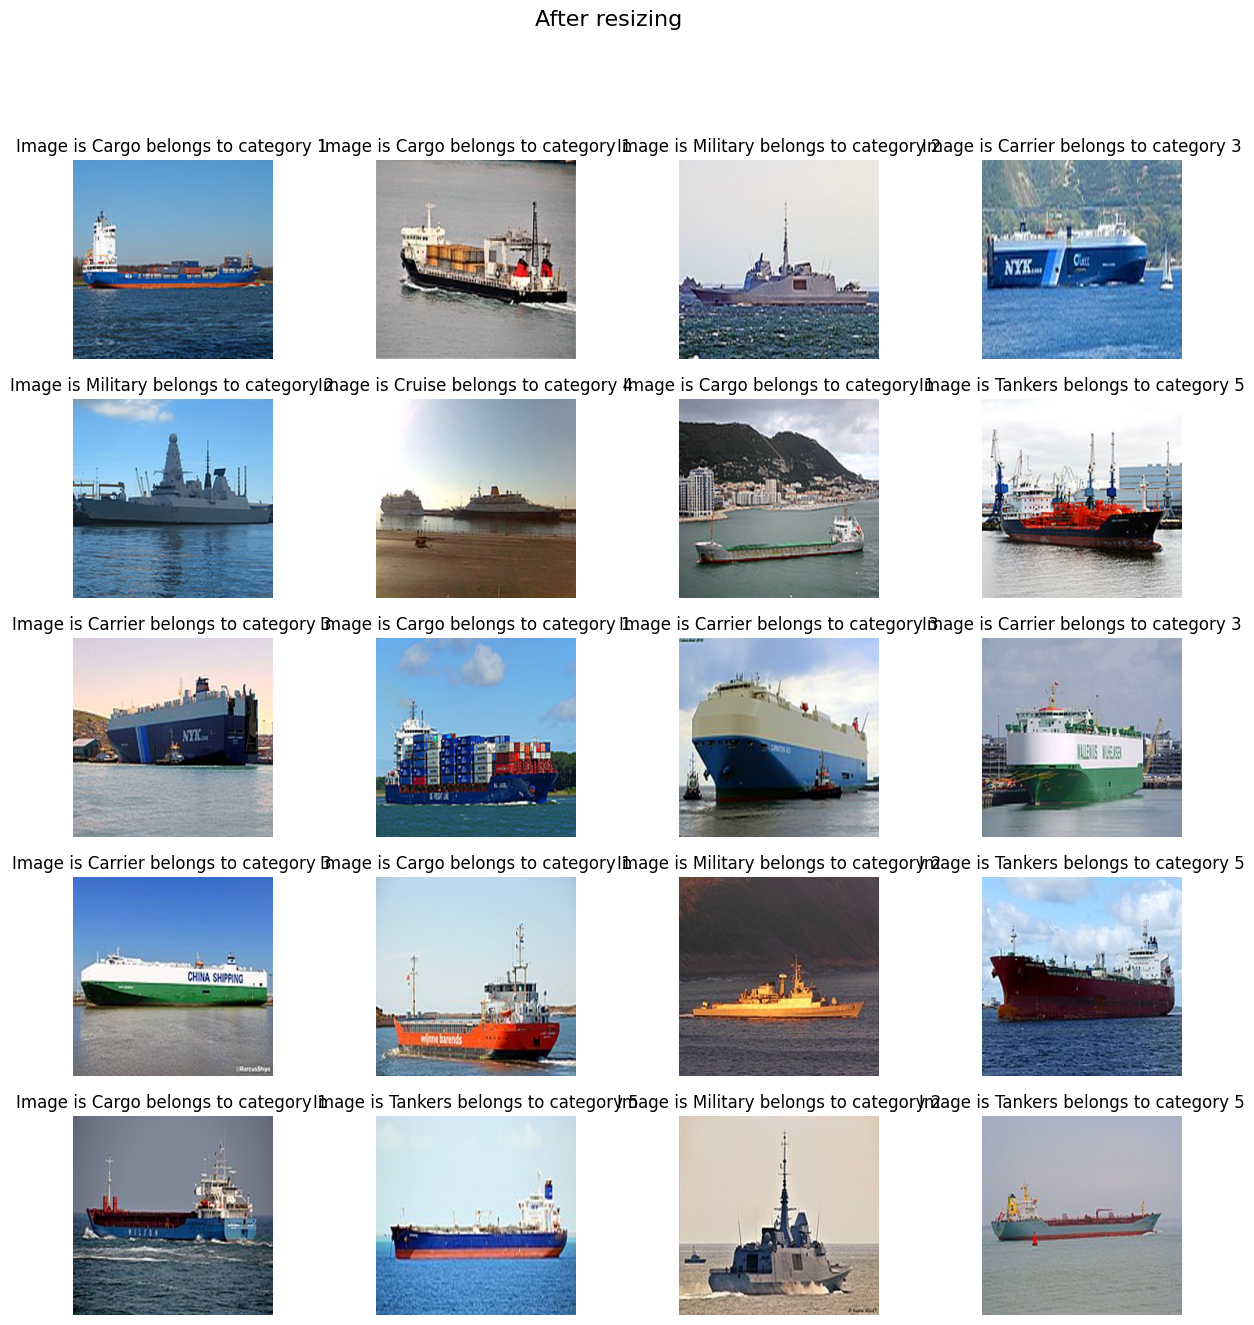

In [10]:
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(15,15))
plt.suptitle('Before resizing', size=16)
print()
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(plt.imread(train['image'][i]))
    plt.title(f"Image is {train['label'][i]} belongs to category {train['category'][i]}")
    plt.axis('off')
    plt.grid(False)

fig2 = plt.figure(figsize=(15,15))
plt.suptitle('After resizing', size=16)
print()
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(resized_image_list[i])
    plt.title(f"Image is {train['label'][i]} belongs to category {train['category'][i]}")
    plt.axis('off')
    plt.grid(False)


In [11]:
class_values = train['category']-1

In [12]:
x_train, x_test, y_train, y_test = train_test_split(resized_image_list, class_values, test_size=0.20, random_state=2023)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5001, 256, 256, 3) (1251, 256, 256, 3) (5001,) (1251,)


In [ ]:
#Splitting the train data itself into train and test 
#X, y = train[['image','label']], train['label']

In [ ]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.20)

In [ ]:
#print (x_train.shape, y_train.shape)

In [ ]:
#print (x_test.shape, y_test.shape)


In [ ]:
# x_train_sampled = x_train.copy(deep=True)
# print(x_train.shape)
# print(x_train_sampled.shape)
# x_train_sampled.head()

In [ ]:
#x_train['image'][0]

In [ ]:
#img_to_array(load_img(x_train['image'][0]).resize((256,256))).shape

In [ ]:
#def pre_precess_normalise(image):
#    return img_to_array(load_img(image).resize((256, 256)))/255.

In [ ]:
#x_train['image'].shape

In [ ]:
#x_train_sampled = pd.DataFrame()
##x_train_sampled = x_train['image'].apply(pre_precess_normalise)
#x_train_sampled = x_train.apply(lambda x: pre_precess_normalise(x['image']), axis=1)
#x_train_sampled.head()

In [ ]:
#print(x_train_sampled[0].shape)
#print(x_train_sampled.shape)

In [ ]:
#x_train['image'][0]

In [ ]:
# resized_image_list = []
# all_paths= []
# target_size = (256, 256)

# for i in range(x_train.shape[0]):
#     img_path = x_train['image'][0]
#     array_val = img_to_array(load_img(img_path).resize((target_size)))/255.
#     resized_image_list.append(array_val)

# resized_image_list = np.asarray(resized_image_list)
# resized_image_list.shape

In [ ]:
#x_test_sampled = x_test['image'].apply(pre_precess_normalise)

In [ ]:
#print(x_train_sampled.shape, x_test_sampled.shape)

## Model building

In [13]:
data_augumentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)
])

In [15]:
model = Sequential()

#conv layer 1
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='valid', strides=1, activation='relu', input_shape=(256, 256, 3)))
#Adding data augumentation
model.add(data_augumentation)
#Average pooling - replace with max pooling
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

#Conv layer 2
model.add(Conv2D(filters=16, kernel_size=(5,5), strides=1, padding='valid', activation='relu'))
#Average pooling - replace with max pooling
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

#Flatten: Convert 2D to 1D
model.add(Flatten())

#Fully connected layer 1
model.add(Dense(120, activation='relu'))

#Fully connected layer 1
model.add(Dense(84, activation='relu'))

#Output layer
model.add(Dense(5, activation='softmax'))

#Summary 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 252, 252, 6)       456       
                                                                 
 sequential (Sequential)     (None, 252, 252, 6)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 126, 126, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 16)      2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 61, 61, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 59536)            

In [16]:
model.compile(optimizer='Adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [22]:
model.output

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dense_5')>

In [17]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
79/79 [==============================] - 72s 877ms/step - loss: 1.7626 - accuracy: 0.3119 - val_loss: 1.4501 - val_accuracy: 0.3725
Epoch 2/5
79/79 [==============================] - 66s 833ms/step - loss: 1.4299 - accuracy: 0.3823 - val_loss: 1.4034 - val_accuracy: 0.4109
Epoch 3/5
79/79 [==============================] - 67s 850ms/step - loss: 1.2793 - accuracy: 0.4575 - val_loss: 1.2102 - val_accuracy: 0.5108
Epoch 4/5
79/79 [==============================] - 68s 865ms/step - loss: 1.1785 - accuracy: 0.5147 - val_loss: 1.1031 - val_accuracy: 0.5468
Epoch 5/5
79/79 [==============================] - 70s 885ms/step - loss: 1.1231 - accuracy: 0.5377 - val_loss: 1.1143 - val_accuracy: 0.5651


## Alexnet model 

In [ ]:
#Alexnet model

alexnet_model = Sequential()

#Conv 1
alexnet_model.add(Conv2D(96, kernel_size=(11,11), strides=4, padding='valid', activation='relu', input_shape=(256, 256, 3)))
#Maxpooling
alexnet_model.add(MaxPool2D(pool_size=(3,3), strides=2, padding='valid'))

#Conv 2
alexnet_model.add(Conv2D(256, kernel_size=(5,5), strides=1, padding='same', activation='relu'))
#Maxpooling
alexnet_model.add(MaxPool2D(pool_size=(3,3), strides=2))

#Conv 3
alexnet_model.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu'))


#Conv 4
alexnet_model.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu'))

#Conv 5
alexnet_model.add(Conv2D(256, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
#Maxpooling
alexnet_model.add(MaxPool2D(pool_size=(3,3), strides=2, padding='valid'))

#Flatten
alexnet_model.add(Flatten())

#Dense layer: FCL1
alexnet_model.add(Dense(4096, activation='relu'))

#Dense layer: FCL2
alexnet_model.add(Dense(4096, activation='relu'))

#Output
alexnet_model.add(Dense(5, activation='softmax'))

#Summary
alexnet_model.summary()

In [ ]:
alexnet_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
alexnet_history = alexnet_model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

In [18]:
from keras.applications.inception_v3 import InceptionV3

transfer_model = InceptionV3(include_top=False, 
                             input_shape=(256, 256, 3), #Leave out the last fully connected layer
                             weights='imagenet')
transfer_model.trainable = False    #Make all the layers non-trainable 
transfer_model.summary()

87910968/87910968 [==============================] - 8s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d_4[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activatio

In [19]:
transfer_model.output

<KerasTensor: shape=(None, 6, 6, 2048) dtype=float32 (created by layer 'mixed10')>

## Transfer learning approach - VGG16

In [23]:
from keras.applications.vgg16 import VGG16

base_vgg16_model = VGG16(
    input_shape=(256, 256, 3), 
    weights='imagenet',
    include_top=False
)

vgg16_transfer = Sequential()
vgg16_transfer.add(base_vgg16_model) # Base VGG 16 model added here

vgg16_transfer.add(Flatten())
vgg16_transfer.add(Dense(128, activation='relu'))
vgg16_transfer.add(Dropout(0.1))

#output layer
vgg16_transfer.add(Dense(5, activation='softmax'))

vgg16_transfer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               4194432   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 5)                 645       
                                                                 
Total params: 18909765 (72.14 MB)
Trainable params: 18909765 (72.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
vgg16_transfer.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
vgg16_transfer_history = vgg16_transfer.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
40/40 [==============================] - 4102s 103s/step - loss: 3.9982 - accuracy: 0.2813 - val_loss: 1.5487 - val_accuracy: 0.3461
Epoch 2/5
 1/40 [..............................] - ETA: 53:31 - loss: 1.5514 - accuracy: 0.3516

KeyboardInterrupt: 